 <a id='TOC'></a>
## Data Storytelling - Table of Contents


#### 1. <a href='#ReadWrangledDataset'>Read wrangled dataset</a>
#### 2. <a href='#ImportPackages'>Import required packages</a>
#### 3. <a href='#defineFunctions'>Define functions</a>
#### 4. <a href='#visualize'>Plot Visualizations</a>

 <a id='ReadWrangledDataset'></a>
 #### Read wrangled dataset
 <a href='#TOC'>Table Of Contents</a>

In [110]:
# Read the wrangled dataset from another jupyter notebook
%store -r 'flipkart_df'

 <a id='ImportPackages'></a>
 #### Import required packages
 <a href='#TOC'>Table Of Contents</a>

In [111]:
# Import all required packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 <a id='defineFunctions'></a>
#### Define functions
 <a href='#TOC'>Table Of Contents</a>

In [112]:
# Extract a list of categories with highest no. of products
def top_categories(size):
    ''' Returns a list of given size having category names with highest number of products'''
    categories_df=flipkart_df.product_category.value_counts().sort_values(ascending=False).head(size)
    categories = list(categories_df.index)
    return categories_df,categories

In [113]:
# Extracting dataframes specific to each category from wrangled dataset(flipkart_df)
def get_category_df(category_list):
    ''' Return list of dataframes specific to each category provided in the list '''
    return [flipkart_df[flipkart_df.product_category == i] for i in category_list]

In [114]:
# Plot bar graph 
def plot_bar(series):
    ''' Plots the bar graph from a given series '''
    
    series.plot.bar(x=series.index, y='product_category',alpha=0.7)
    
    # Set the title
    _ = plt.title('Top 10 Product Categories based on the no. of products')
    
    # Set the x-axis label
    _ = plt.xlabel('Product Categories')
    
    # Rotate the x-axis labels to 60 so, they don't overlap
    _ = plt.xticks(rotation=60)
    
    # Set the y-axis label
    _ = plt.ylabel('No. of Products')
    
    # Show the plot
    plt.show()

In [115]:
# Plot histogram of 4 one-dimensional arrays
def plot_histogram(a,b,c,d,name='label name',xlim=1):
    ''' Plot a 4x4 figure with histograms for 4 one-dimensional arrays'''
    
    # Create figure with dimensions
    fig = plt.figure(figsize=(12,8))
    
    # Create axes
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    
    # plot histograms
    ax1.hist(a[a.notnull()], bins=5,color='red',density=True)
    ax2.hist(b[b.notnull()], bins=5,color='green',density=True)
    ax3.hist(c[c.notnull()], bins=5,color='coral',density=True)
    ax4.hist(d[d.notnull()], bins=5,color='blue',density=True)
    
    # label the axes
    ax1.set_title('Clothing '+name )
    ax1.set_xticks(range(1,6))
    ax1.set_ylabel('Frequency')
    
    # label the axes
    ax2.set_title('Jewellery '+name )
    ax2.set_xticks(range(1,6))
    ax2.set_ylabel('Frequency')
    
    # label the axes
    ax3.set_title('Footwear '+name )
    ax3.set_xticks(range(1,6))
    ax3.set_ylabel('Frequency')
    
    # label the axes
    ax4.set_title('Mobiles '+name )
    ax4.set_xticks(range(1,6))
    ax4.set_ylabel('Frequency')
   
    plt.show()

In [116]:
# Visualize bar plot highest discounted price in each category
def plot_highest_discounted_product(stacked,colors_list):
    ''' Plot a stacked/unstacked bar graph based on given type '''
    # Extract required columns to plot
    viz = flipkart_df[['product_category','retail_price','final_price','discounted_price']]

    # Sort by highest discount price
    viz = viz.sort_values(by=['product_category','discounted_price'],ascending=False)

    # Drop duplicate columns - Retaining only the top discounted product in each product category
    viz.drop_duplicates(subset=['product_category'], keep='first', inplace=True)

    # Sort the filtered dataframe based on highest discount price
    viz.sort_values(by=['discounted_price'],inplace=True,ascending=False)

    # Set product category as the index - to categorize prices for each category
    viz.set_index('product_category',inplace=True)

    # Stacked bar graph comparing the retail, final and discount prices for 
    # highest discounted product from each of the top 10 categories
    _=plt.rcParams["figure.figsize"] = (12,8)

    # visualize stacked bar plot
    ax = viz[:10].plot.bar(stacked=stacked,color=colors_list)
    
    #label the axes
    plt.title('Top discounted price product from each of the top 10 categories')
    plt.xlabel('Product categories')
    plt.ylabel('Prices')
    plt.show()
    print(viz[:10])

In [117]:
# Empirical cummulative distribution function
def ecdf(data):
    ''' Compute ECDF for a one-dimensional array of measurements. '''
    # Total no. of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [118]:
# Plot the ecdf
def plot_ecdf(data, color,marker,label_name):
    ''' Plot the ECDF for one-dimensional array '''
    
    # Compute ECDF for given 1D array
    x, y = ecdf(data)
    
    # Plot the ECDF
    _ = plt.plot(x, y, marker=marker, color=color,linestyle='none', label=label_name)
    
    # Set the title
    _ = plt.title("Empirical CDF")
    
    # Label the axes
    _ = plt.xlabel("Discount price")
    _ = plt.ylabel("ECDF")
    
    # resolve the location of legend
    _ = plt.legend(loc='lower right')

In [119]:
def time_series():
    ''' Plotting Timeseries for Retail and Discount price for top 3 categories '''

    # Define which subplot to activate
    plt.subplot(2,2,1)
    
    # Rotate x ticks so the labels will not be cluttered
    plt.xticks(rotation=45)
    
    # Label the axes
    plt.ylabel('Retail Price')
    
    # Describe the plot by providing title
    plt.title('Retail price for top 3 categories: Jan\'2016 to Jul\'2016')
    
    # Plot a line plot
    plt.plot(clothing_df.loc['2016':,'retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016':,'retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016':,'retail_price'], color='mediumblue', label='Footwear')
    
    # Place a legend and provide its location
    plt.legend(loc='upper right')

    plt.subplot(2,2,2)
    plt.xticks(rotation=45)
    plt.ylabel('Discount Price')
    plt.title('Discount price for top 3 categories: Jan\'2016 to Jul\'2016')
    plt.plot(clothing_df.loc['2016':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016':,'discounted_price'], color='green', label='Footwear')
    plt.legend(loc='upper right')

    plt.subplot(2,2,3)
    plt.xticks(rotation=45)
    plt.ylabel('Retail Price')
    plt.title('Retail price of highest priced product: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15','retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15','retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15','retail_price'], color='mediumblue', label='Footwear')
    plt.legend(loc='upper left')

    plt.subplot(2,2,4)
    plt.xticks(rotation=50)
    plt.ylabel('Discount Price')
    plt.title('Discount price of highest priced product: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='green', label='Footwear')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [120]:
def time_series_inset_retail():
    ''' Timeseries Inset Plot based on retail price'''

    # Rotate x ticks so the labels will not be cluttered
    plt.xticks(rotation=45)
    
    # Label the axes
    plt.ylabel('Retail Price')
    
    # Describe the plot by providing title
    plt.title('Retail price for top 3 categories: Jan\'2016 to Jul\'2016')
    
    # Plot a line plot
    plt.plot(clothing_df.loc['2016':,'retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016':,'retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016':,'retail_price'], color='mediumblue', label='Footwear')
    
    # Place a legend and provide its location
    plt.legend(loc='upper right')
    plt.axes([0.60, 0.48, 0.15, 0.35])
    plt.xticks(rotation=45)
    plt.ylabel('Retail Price')
    plt.title('Highest: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15','retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15','retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15','retail_price'], color='mediumblue', label='Footwear')


In [121]:
def time_series_inset_discount():
    ''' Timeseries Inset Plot based on discount price '''
    plt.xticks(rotation=45)
    plt.ylabel('Discount Price')
    plt.title('Discount price for top 3 categories: Jan\'2016 to Jul\'2016')
    plt.plot(clothing_df.loc['2016-Jan':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016-Jan':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016-Jan':,'discounted_price'], color='green', label='Footwear')
    plt.legend(loc='upper right')
    plt.axes([0.56, 0.58, 0.15, 0.25])
    plt.xticks(rotation=50)
    plt.ylabel('Discount Price')
    plt.title('Highest: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='green', label='Footwear')

<a id='visualize'></a>
#### Visualizations
<a href='#TOC'>Table Of Contents</a>

## Top 10 product categories with highest number of products:
1. Product Category "Clothing" has more than 6000 products establishing it as a category with highest number of products.
2. Product Category "Jewellery" has more than 3500 products allowing it to be the second highest category of products.
3. The next four categories depict that, they have less than 1500 products in each category.
4. The bottom four categories depict that, they have less than 1000 products in each cotegory.
5. All the remaining categories can be interpreted as having less than 600 products.

                Product Categories  Number_of_Products
               -------------------  ------------------
                          Clothing	6290
                         Jewellery	3588
                          Footwear	1260
             Mobiles & Accessories	1099
                        Automotive	1018
        Home Decor & Festive Needs	931
          Beauty and Personal Care	710
                   Home Furnishing	700
                  Kitchen & Dining	647
                         Computers	588

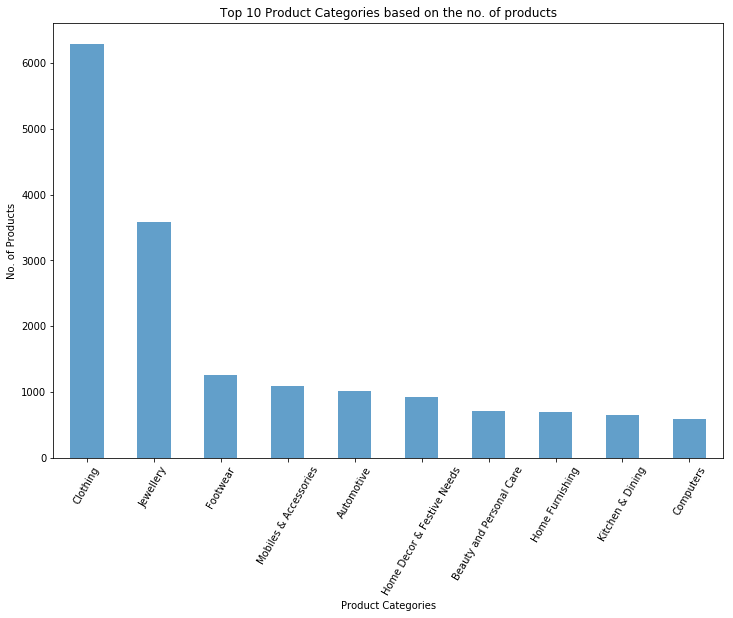

,Number of Products
Clothing,6290
Jewellery,3588
Footwear,1260
Mobiles & Accessories,1099
Automotive,1018
Home Decor & Festive Needs,931
Beauty and Personal Care,710
Home Furnishing,700
Kitchen & Dining,647
Computers,588


In [122]:
# Plot bar graph for top 10 categories having highest number of products
df_10, _ = top_categories(10)
plot_bar(df_10)
df_10.to_frame().rename(columns={'product_category':'Number of Products'})

## Top 10 categories with highest discount priced product

----

The prices of Category "Furniture" are much higher when compared to other categories

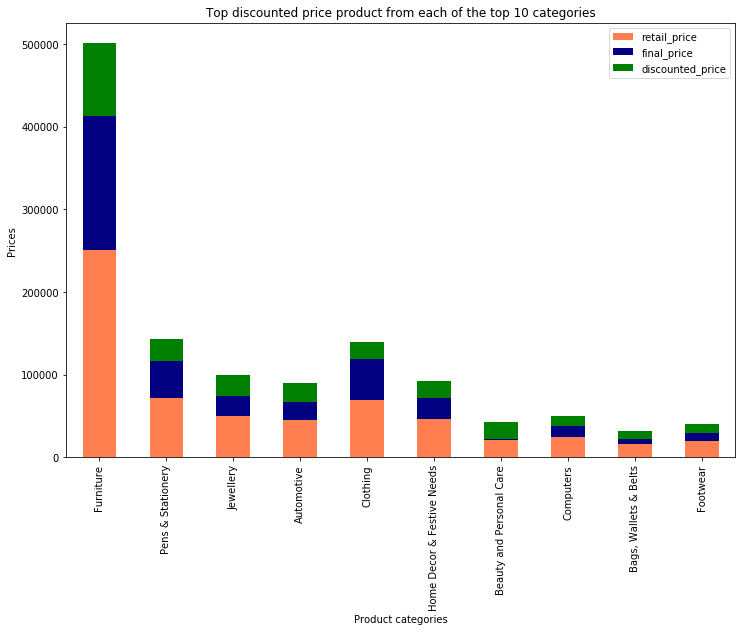

                            retail_price  final_price  discounted_price
product_category                                                       
Furniture                       250500.0     162825.0           87675.0
Pens & Stationery                71687.0      44804.0           26883.0
Jewellery                        49999.0      24580.0           25419.0
Automotive                       44880.0      22440.0           22440.0
Clothing                         69999.0      48999.0           21000.0
Home Decor & Festive Needs       46500.0      25510.0           20990.0
Beauty and Personal Care         21125.0       1700.0           19425.0
Computers                        25000.0      13390.0           11610.0
Bags, Wallets & Belts            15999.0       5890.0           10109.0
Footwear                         19995.0       9997.0            9998.0


In [123]:
# Stacked Bar graph comparing the retail, final and discount prices for top 10 categories
plot_highest_discounted_product(stacked=True,colors_list=['coral','navy','green'])

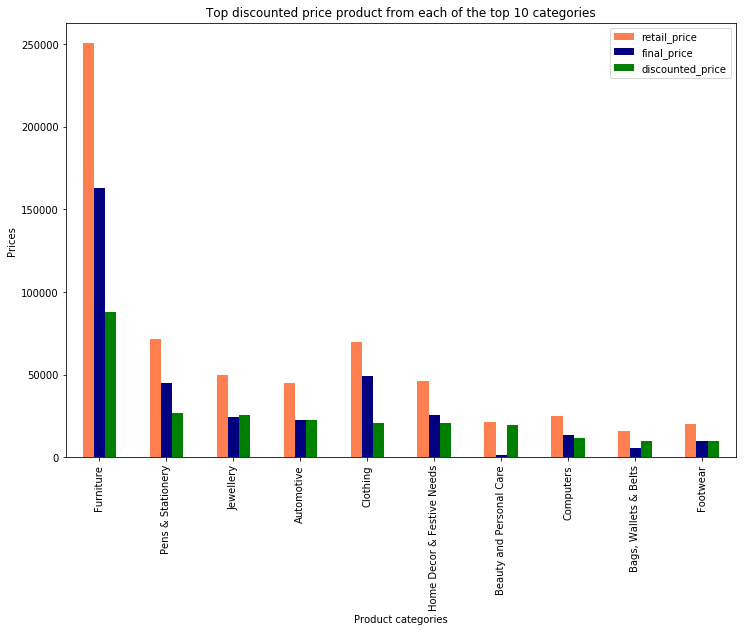

                            retail_price  final_price  discounted_price
product_category                                                       
Furniture                       250500.0     162825.0           87675.0
Pens & Stationery                71687.0      44804.0           26883.0
Jewellery                        49999.0      24580.0           25419.0
Automotive                       44880.0      22440.0           22440.0
Clothing                         69999.0      48999.0           21000.0
Home Decor & Festive Needs       46500.0      25510.0           20990.0
Beauty and Personal Care         21125.0       1700.0           19425.0
Computers                        25000.0      13390.0           11610.0
Bags, Wallets & Belts            15999.0       5890.0           10109.0
Footwear                         19995.0       9997.0            9998.0


In [124]:
# Unstacked Bar graph comparing the retail, final and discount prices for top 10 categories
plot_highest_discounted_product(stacked=False,colors_list=['coral','navy','green'])

## Top 4 Categories with more number of ratings

Product ratings are classified with bands(1-5) as follows:

    5 - Excellent
    4 - Very good
    3 - Good
    2 - Average
    1 - Poor

After exploring the below graphs of Product ratings, "Jewellery" Product category has the highest number of ratings with 80% of them classified under "Excellent" bands when compared to  other categories which have only about 50% of their ratings under the top band. 

Also, Product Category "Mobiles" tend to have more "poor" ratings when compared to other categories.

In [125]:
# Extract category specific datasets
_, category_list = top_categories(4)
clothing_df, jewellery_df, footwear_df, mobiles_df = get_category_df(category_list)

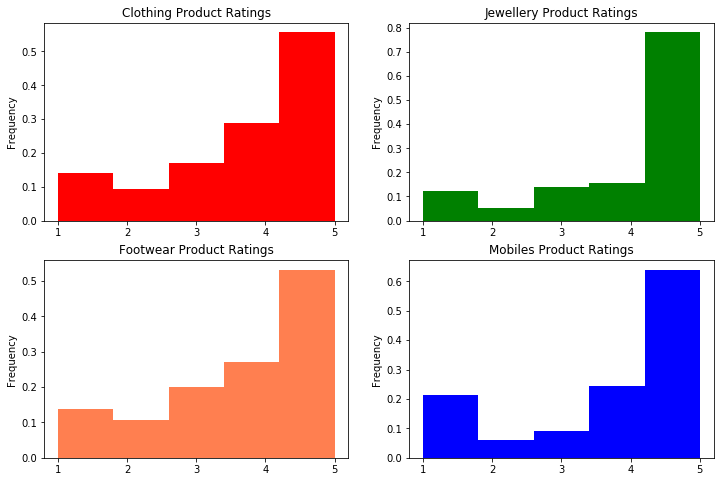

In [126]:
# Plot histogram of product ratings for top 4 categories 
plot_histogram(clothing_df.product_rating,jewellery_df.product_rating,footwear_df.product_rating,mobiles_df.product_rating,name='Product Ratings')

## Compare the Discount prices of top 4 categories with highest no. of products.

From the ECDFs below, the rate of discount price has seen a decline in the "Jewellery" category  after 80%.

The maximum Discount price for 

    1. "Clothing" category = 20,000
    2. "Footwear" category = 10,000
    3. "Jewellery" category = 25,000

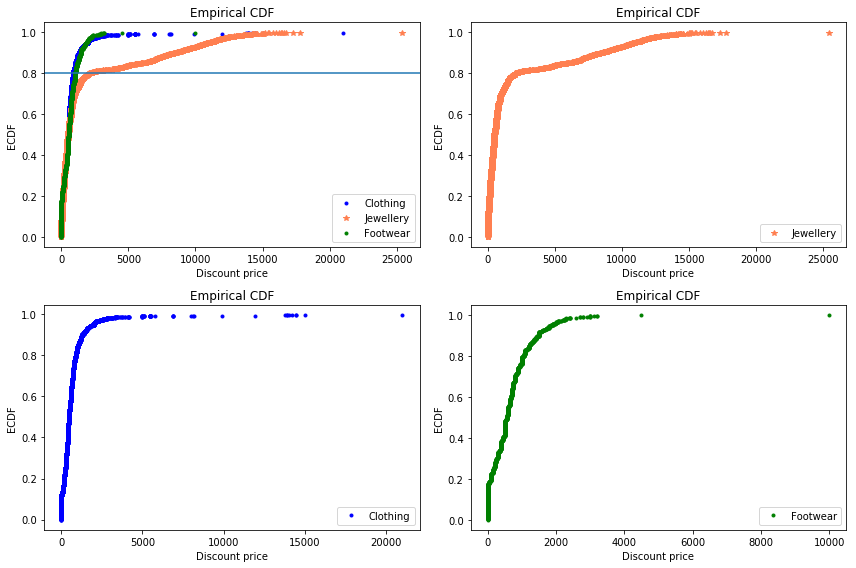

In [127]:
# ECDF's for top 4 categories based on discount prices
plt.subplot(2,2,1)
plot_ecdf(clothing_df.discounted_price,color='blue',marker='.',label_name='Clothing')
plot_ecdf(jewellery_df.discounted_price,color='coral',marker='*',label_name='Jewellery')
plot_ecdf(footwear_df.discounted_price,color='green',marker='.',label_name='Footwear')
plt.axhline(y=.8)
plt.subplot(2,2,2)
plot_ecdf(jewellery_df.discounted_price,color='coral',marker='*',label_name='Jewellery')
plt.subplot(2,2,3)
plot_ecdf(clothing_df.discounted_price,color='blue',marker='.',label_name='Clothing')
plt.subplot(2,2,4)
plot_ecdf(footwear_df.discounted_price,color='green',marker='.',label_name='Footwear')
plt.tight_layout()

## Top 3 categories - examine Retail Price for outliers

It is clear from the below box plot, that there are outlier for "Clothing" category and "Footwear" category. Jewellery category has its prices distributed evenly.

In [128]:
# Create a subset of flipkart_df having data only for top 3 cateories
top3_categories = flipkart_df[flipkart_df.product_category.isin(['Clothing','Jewellery','Footwear'])][['retail_price','product_category','discounted_price','final_price','product_rating','is_FK_Advantage_product']]
top3_categories.product_category = top3_categories.product_category.astype('str')
top3_categories.product_category=top3_categories.product_category.astype('category')

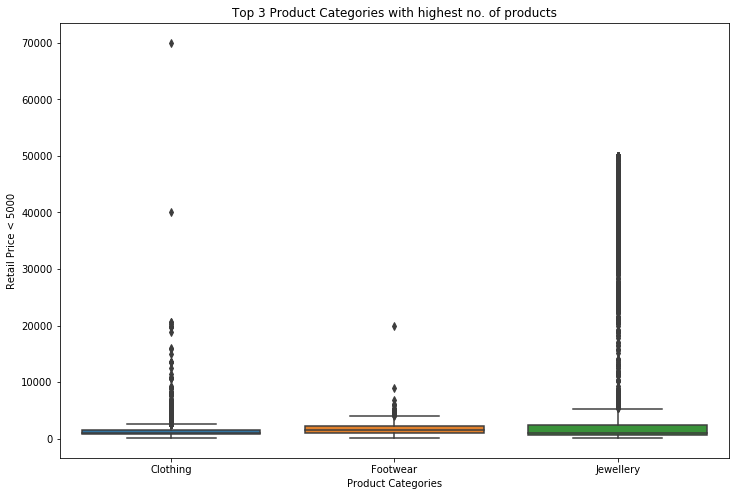

In [129]:
# Plot a box plot to visualize any outliers in Retail Price
sns.boxplot(x='product_category',y='retail_price',data=top3_categories)
plt.title('Top 3 Product Categories with highest no. of products')
plt.ylabel('Retail Price < 5000')
plt.xlabel('Product Categories')

# Removing outliers for further analysis
top3_categories=top3_categories[top3_categories.retail_price < 20000]

## Top 3 categories - examine Retail Price after removing outliers

It can interpreted from the below plot, that more number of products have their retail price less than 5000

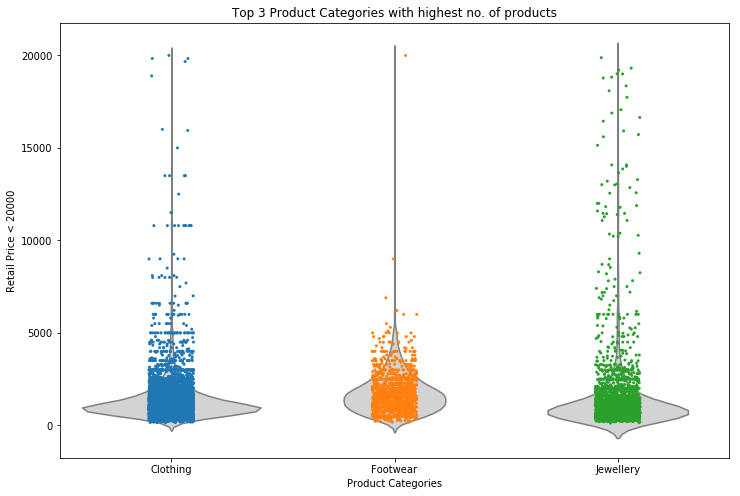

In [130]:
# Violin and Strip plot of retail prices
_ = sns.violinplot(x='product_category',y='retail_price',data=top3_categories,size=3,inner=None,color='lightgray')
_ = sns.stripplot(x='product_category',y='retail_price',data=top3_categories,size=3,jitter=True)
_ = plt.title('Top 3 Product Categories with highest no. of products')
_ = plt.ylabel('Retail Price < 20000')
_ = plt.xlabel('Product Categories')

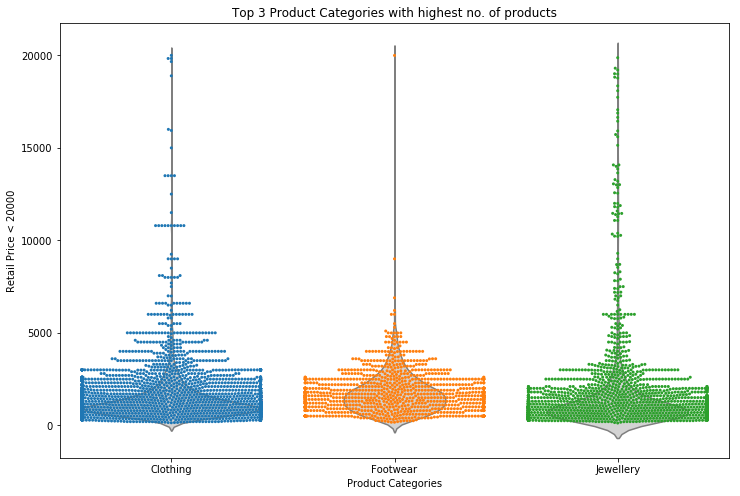

In [131]:
# Violin and Swarm plot of retail prices
_ = sns.violinplot(x='product_category',y='retail_price',data=top3_categories,size=3,inner=None,color='lightgray')
_ = sns.swarmplot(x='product_category',y='retail_price',data=top3_categories,size=3)
_ = plt.title('Top 3 Product Categories with highest no. of products')
_ = plt.ylabel('Retail Price < 20000')
_ = plt.xlabel('Product Categories')

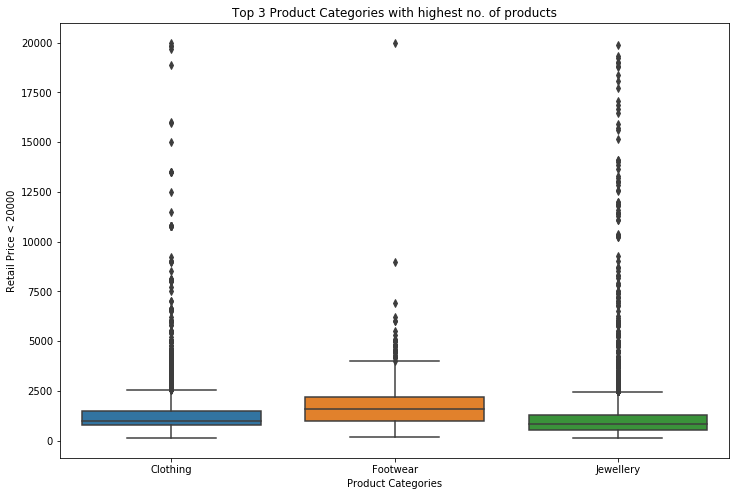

In [132]:
# Box plot of retail prices
_ = sns.boxplot(x='product_category',y='retail_price',data=top3_categories)
_ = plt.title('Top 3 Product Categories with highest no. of products')
_ = plt.ylabel('Retail Price < 20000')
_ = plt.xlabel('Product Categories')

## Identifying correlation between retail and discount price

It can interpreted from the below plot that there is a positive correlation between retail and discount price. But, how strongly these two quantities are correlated need to be analyzed further using inferential statistical methods. 

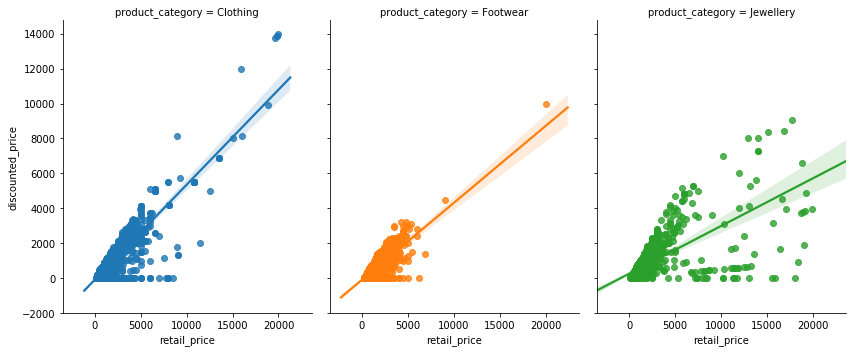

In [133]:
_ = sns.lmplot(x="retail_price", y="discounted_price", col="product_category", hue="product_category",
                data=top3_categories, col_wrap=3,height=5,aspect=.8)

## Identifying Residuals

It can be interpreted from the below plot that most of the data points are closer to the regression line, with outliers far away from the line which was identified earlier from the box plot.

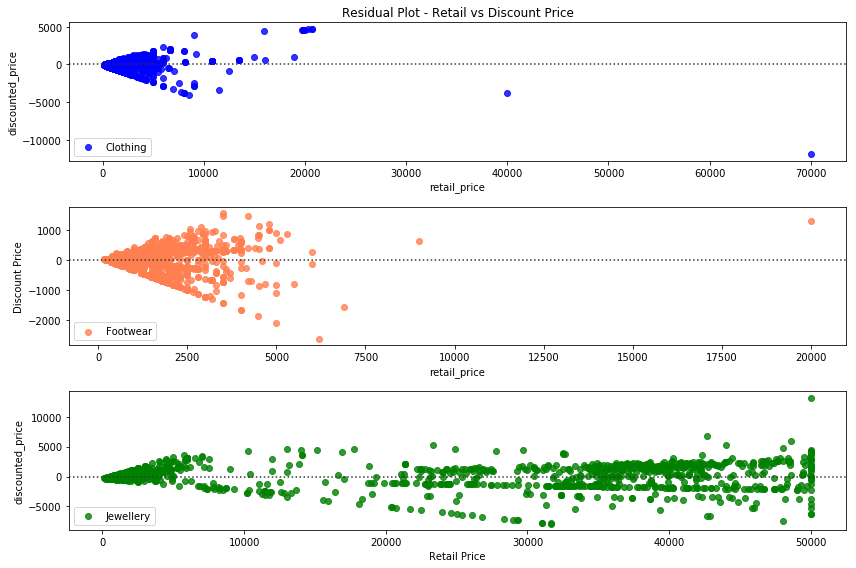

In [134]:
# Plotting the Residuals
c=clothing_df[clothing_df.retail_price.notnull() & clothing_df.retail_price.notnull()]
j=jewellery_df[jewellery_df.retail_price.notnull() & jewellery_df.retail_price.notnull()]
f=footwear_df[footwear_df.retail_price.notnull() & footwear_df.retail_price.notnull()]
plt.subplot(3,1,1)
ax1 = sns.residplot(x='retail_price',y='discounted_price',data=c,color='blue',label='Clothing')
plt.title('Residual Plot - Retail vs Discount Price')
plt.legend(loc='lower left')
plt.subplot(3,1,2)
ax2 = sns.residplot(x='retail_price',y='discounted_price',data=f,color='coral',label='Footwear')
plt.ylabel('Discount Price')
plt.legend(loc='lower left')
plt.subplot(3,1,3)
ax3 = sns.residplot(x='retail_price',y='discounted_price',data=j,color='green',label='Jewellery')
plt.xlabel('Retail Price')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Analysing Time Series -

It can interpreted from the below plots that highest priced products are added in Quarter 1. "Clothing" category has more discounted products than the other two categories.

In [135]:
# Plotting Time series  
# Set the index to DatetimeIndex
clothing_df.set_index('crawl_timestamp',inplace=True)
jewellery_df.set_index('crawl_timestamp',inplace=True)
footwear_df.set_index('crawl_timestamp',inplace=True)
mobiles_df.set_index('crawl_timestamp',inplace=True)

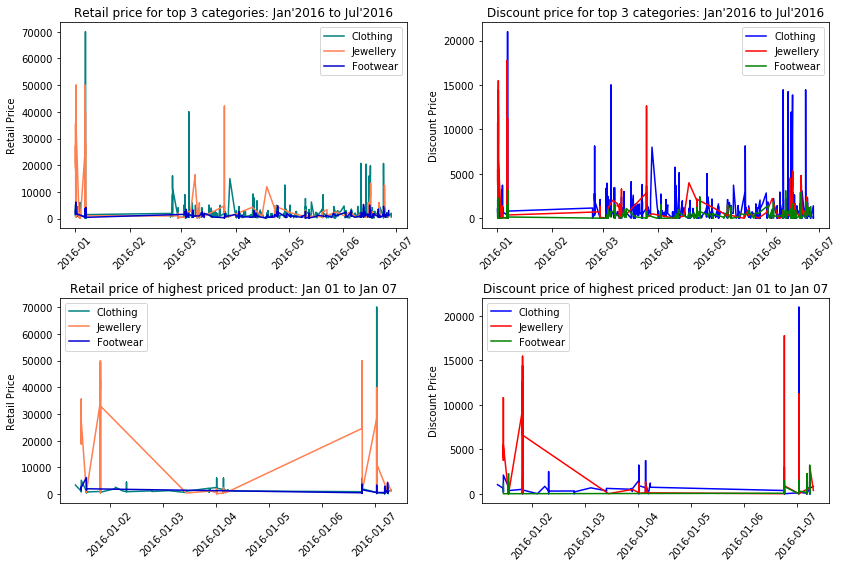

In [136]:
time_series()

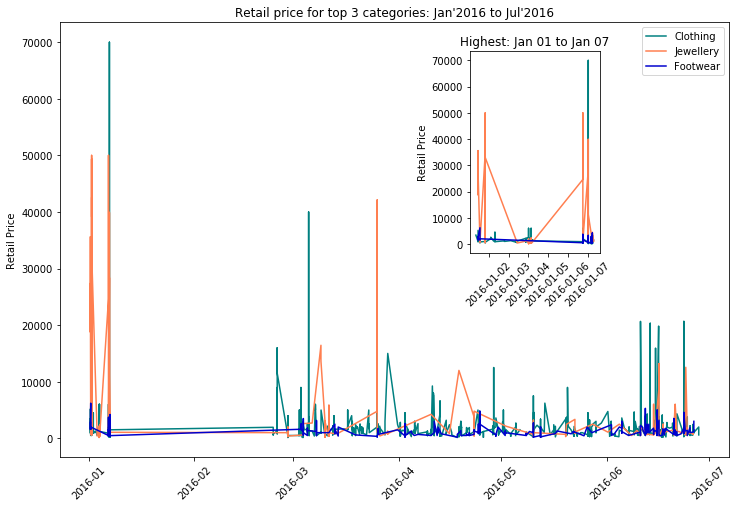

In [137]:
time_series_inset_retail()

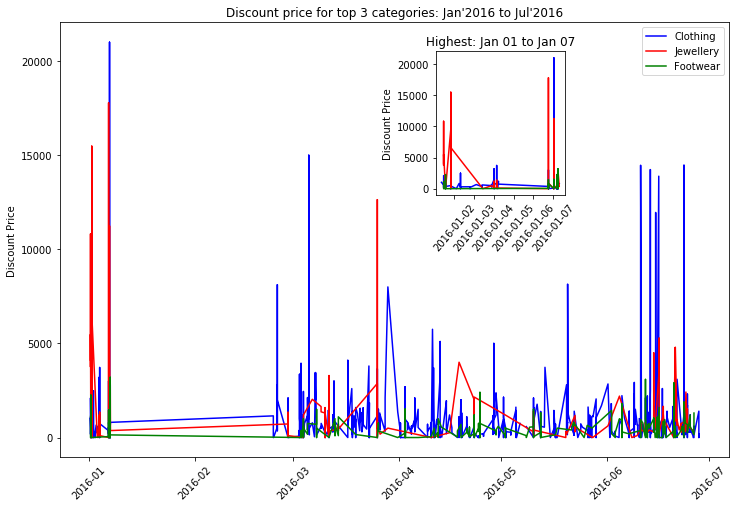

In [138]:
time_series_inset_discount()